In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import pandas as pd
from torch.utils.data import DataLoader
from tqdm import tqdm


from dataset import patch_dataset
from trainer import train
from models import basic_FCN, UNet

In [ ]:
file_path_X = 'X_train'
file_path_Y = 'Y_train'
index = np.load('X_train/_index_good.npy')

dataset = patch_dataset(file_path_X, file_path_Y,index,load_in_ram=True, numtype=torch.float32)
dataset.X = dataset.X.unsqueeze(1)
print(dataset.X.shape)  # Should print (3423, 1, 160, 272)

dataset.Y = dataset.Y.permute(0, 3, 1, 2)
print(dataset.Y.shape)  # Should print (3423, 3, 160, 272)

torch.Size([3423, 1, 160, 272])
torch.Size([3423, 3, 160, 272])


In [27]:
print(dataset.Y.permute(0, 2, 3 ,1).shape)

torch.Size([3423, 160, 272, 3])


In [4]:
batch_size = 64

dataloader = DataLoader(dataset, batch_size, shuffle=True)

for x,y in tqdm(dataloader):
    print(x.shape)
    print(y.shape)
    break

  0%|          | 0/54 [00:00<?, ?it/s]

torch.Size([64, 1, 160, 272])
torch.Size([64, 3, 160, 272])


In [5]:
model = UNet(in_channels=1, out_channels=3, features=[32, 64, 128, 256])
model.to('mps')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = criterion = torch.nn.CrossEntropyLoss()

In [6]:
x, y = next(iter(dataloader))
x = x.to('mps')
y = y.to('mps')
model(x).shape

torch.Size([64, 3, 160, 272])

In [7]:
train(model, optimizer, loss_fn, dataloader, device='mps', epochs=50)

100%|██████████| 54/54 [02:47<00:00,  3.10s/it]


Epoch 1/50, Train Loss: 0.8633


100%|██████████| 54/54 [02:40<00:00,  2.96s/it]


Epoch 2/50, Train Loss: 0.2970


100%|██████████| 54/54 [02:46<00:00,  3.08s/it]


Epoch 3/50, Train Loss: 0.1895


100%|██████████| 54/54 [02:52<00:00,  3.20s/it]


Epoch 4/50, Train Loss: 0.1429


100%|██████████| 54/54 [02:53<00:00,  3.22s/it]


Epoch 5/50, Train Loss: 0.1095


100%|██████████| 54/54 [03:04<00:00,  3.42s/it]


Epoch 6/50, Train Loss: 0.0960


100%|██████████| 54/54 [03:12<00:00,  3.57s/it]


Epoch 7/50, Train Loss: 0.0865


100%|██████████| 54/54 [03:13<00:00,  3.58s/it]


Epoch 8/50, Train Loss: 0.0829


100%|██████████| 54/54 [03:32<00:00,  3.94s/it]


Epoch 9/50, Train Loss: 0.0788


100%|██████████| 54/54 [03:39<00:00,  4.06s/it]


Epoch 10/50, Train Loss: 0.0757


100%|██████████| 54/54 [03:42<00:00,  4.12s/it]


Epoch 11/50, Train Loss: 0.0748


100%|██████████| 54/54 [03:45<00:00,  4.17s/it]


Epoch 12/50, Train Loss: 0.0721


100%|██████████| 54/54 [03:43<00:00,  4.15s/it]


Epoch 13/50, Train Loss: 0.0715


100%|██████████| 54/54 [03:42<00:00,  4.13s/it]


Epoch 14/50, Train Loss: 0.0707


100%|██████████| 54/54 [03:39<00:00,  4.07s/it]


Epoch 15/50, Train Loss: 0.0698


100%|██████████| 54/54 [03:37<00:00,  4.03s/it]


Epoch 16/50, Train Loss: 0.0687


100%|██████████| 54/54 [03:35<00:00,  4.00s/it]


Epoch 17/50, Train Loss: 0.0683


100%|██████████| 54/54 [03:34<00:00,  3.98s/it]


Epoch 18/50, Train Loss: 0.0667


100%|██████████| 54/54 [03:39<00:00,  4.07s/it]


Epoch 19/50, Train Loss: 0.0657


100%|██████████| 54/54 [03:35<00:00,  3.99s/it]


Epoch 20/50, Train Loss: 0.0659


100%|██████████| 54/54 [03:39<00:00,  4.06s/it]


Epoch 21/50, Train Loss: 0.0663


100%|██████████| 54/54 [03:37<00:00,  4.03s/it]


Epoch 22/50, Train Loss: 0.0649


100%|██████████| 54/54 [03:36<00:00,  4.01s/it]


Epoch 23/50, Train Loss: 0.0638


100%|██████████| 54/54 [03:36<00:00,  4.01s/it]


Epoch 24/50, Train Loss: 0.0641


100%|██████████| 54/54 [03:36<00:00,  4.02s/it]


Epoch 25/50, Train Loss: 0.0629


100%|██████████| 54/54 [03:36<00:00,  4.00s/it]


Epoch 26/50, Train Loss: 0.0625


100%|██████████| 54/54 [03:40<00:00,  4.08s/it]


Epoch 27/50, Train Loss: 0.0623


100%|██████████| 54/54 [03:38<00:00,  4.04s/it]


Epoch 28/50, Train Loss: 0.0619


100%|██████████| 54/54 [03:35<00:00,  4.00s/it]


Epoch 29/50, Train Loss: 0.0615


100%|██████████| 54/54 [03:35<00:00,  3.99s/it]


Epoch 30/50, Train Loss: 0.0614


100%|██████████| 54/54 [03:36<00:00,  4.01s/it]


Epoch 31/50, Train Loss: 0.0607


100%|██████████| 54/54 [03:32<00:00,  3.94s/it]


Epoch 32/50, Train Loss: 0.0607


100%|██████████| 54/54 [03:33<00:00,  3.96s/it]


Epoch 33/50, Train Loss: 0.0596


100%|██████████| 54/54 [03:28<00:00,  3.86s/it]


Epoch 34/50, Train Loss: 0.0589


100%|██████████| 54/54 [03:13<00:00,  3.58s/it]


Epoch 35/50, Train Loss: 0.0596


100%|██████████| 54/54 [03:40<00:00,  4.09s/it]


Epoch 36/50, Train Loss: 0.0587


100%|██████████| 54/54 [03:31<00:00,  3.91s/it]


Epoch 37/50, Train Loss: 0.0581


100%|██████████| 54/54 [03:32<00:00,  3.93s/it]


Epoch 38/50, Train Loss: 0.0591


100%|██████████| 54/54 [03:33<00:00,  3.96s/it]


Epoch 39/50, Train Loss: 0.0579


100%|██████████| 54/54 [03:36<00:00,  4.01s/it]


Epoch 40/50, Train Loss: 0.0573


100%|██████████| 54/54 [03:34<00:00,  3.96s/it]


Epoch 41/50, Train Loss: 0.0570


100%|██████████| 54/54 [03:22<00:00,  3.75s/it]


Epoch 42/50, Train Loss: 0.0564


100%|██████████| 54/54 [03:07<00:00,  3.47s/it]


Epoch 43/50, Train Loss: 0.0566


100%|██████████| 54/54 [03:06<00:00,  3.46s/it]


Epoch 44/50, Train Loss: 0.0552


100%|██████████| 54/54 [03:14<00:00,  3.60s/it]


Epoch 45/50, Train Loss: 0.0552


100%|██████████| 54/54 [03:35<00:00,  3.99s/it]


Epoch 46/50, Train Loss: 0.0546


100%|██████████| 54/54 [04:12<00:00,  4.67s/it]


Epoch 47/50, Train Loss: 0.0538


100%|██████████| 54/54 [04:12<00:00,  4.67s/it]


Epoch 48/50, Train Loss: 0.0535


100%|██████████| 54/54 [04:13<00:00,  4.69s/it]


Epoch 49/50, Train Loss: 0.0535


100%|██████████| 54/54 [04:11<00:00,  4.65s/it]

Epoch 50/50, Train Loss: 0.0525


In [8]:
torch.save(model.state_dict(), 'models/first_unet.pth')

  0%|          | 0/54 [00:00<?, ?it/s]

torch.Size([160, 272])
torch.Size([64, 160, 272, 3])
tensor([0., 0., 1.], device='mps:0')


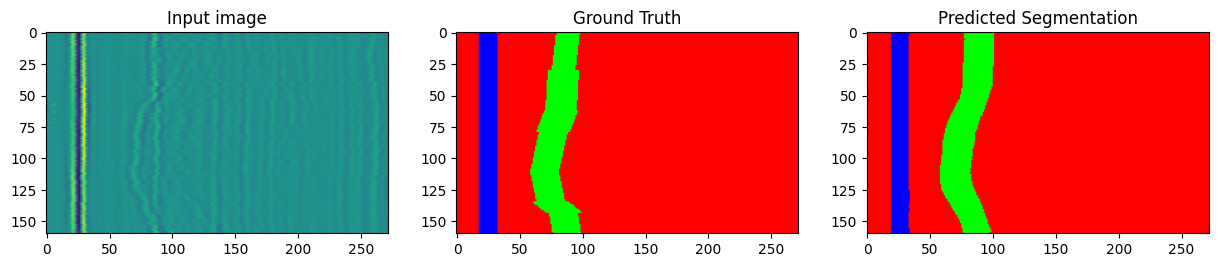

  0%|          | 0/54 [00:03<?, ?it/s]


In [10]:
for x,y in tqdm(dataloader):
    x = x.to('mps')
    y = y.permute(0, 2, 3, 1).to('mps')
    logits = model(x)[0]
    pred = torch.argmax(logits, dim=0)
    print(pred.shape)
    print(y.shape)
    print(y[0, 20, 25, :])

    pred = pred.cpu().detach().numpy()
    # Define RGB colors for each class
    colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])  # Red, Green, Blue

    # Convert class indices to RGB colors
    segmentation_mask = colors[pred]  # Shape: (H, W, 3)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(x[0].permute(1, 2, 0).cpu().detach().numpy())
    axs[0].set_title('Input image')

    axs[1].imshow(y[0].cpu().detach().numpy())
    axs[1].set_title('Ground Truth')

    axs[2].imshow(segmentation_mask)
    axs[2].set_title('Predicted Segmentation')

    plt.show()

    

    break

In [20]:
import os
import re
from os import listdir
from os.path import isfile, join

num_images = len(os.listdir('X_test'))

onlyfiles = [f for f in listdir('X_test') if isfile(join('X_test', f))]
onlyfiles = np.asarray(onlyfiles)
sorting = np.empty([onlyfiles.shape[0]],dtype=np.int16)

for i in range(onlyfiles.shape[0]):
    id_ = re.findall(r'\d+', onlyfiles[i])
    id_ = int(id_[0])*1000 + int(id_[1])*100 + int(id_[2])
    sorting[i] = id_

onlyfiles = onlyfiles[np.argsort(sorting)]
index = onlyfiles

X_test = torch.empty((num_images, 160, 272), dtype=torch.float32)
file_path_X = 'X_test'

for i, file in zip(range(num_images),index):
    X_test[i] = torch.from_numpy(np.load(file_path_X+'/'+file))

print(X_test.shape) 

torch.Size([972, 160, 272])


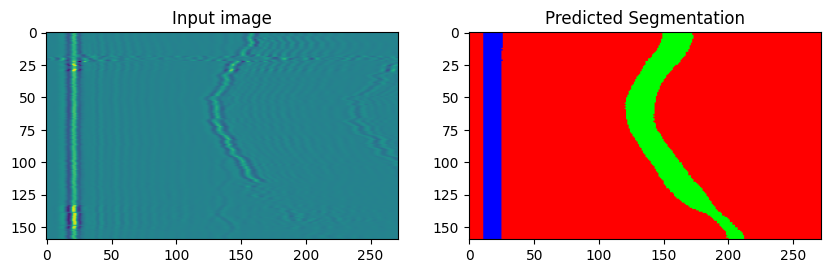

In [17]:
model.eval()
with torch.no_grad():
    i = np.random.randint(0, num_images)
    x = X_test[i].unsqueeze(0).unsqueeze(0).to('mps')
    # x = x.unsqueeze(0).unsqueeze(0).to('mps')
    logits = model(x)[0]
    pred = torch.argmax(logits, dim=0)
    pred = pred.cpu().detach().numpy()
    colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])  # Red, Green, Blue
    segmentation_mask = colors[pred]  # Shape: (H, W, 3)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(x[0].permute(1, 2, 0).cpu().detach().numpy())
    axs[0].set_title('Input image')
    axs[1].imshow(segmentation_mask)
    axs[1].set_title('Predicted Segmentation')
    plt.show()

In [34]:
import os

model.eval()
predictions = []

os.makedirs('predictions', exist_ok=True)

with torch.no_grad():
    for i in range(num_images):
        x = X_test[i].unsqueeze(0).unsqueeze(0).to('mps')
        logits = model(x)
        pred = torch.argmax(logits, dim=0)
        pred = pred.permute(1, 2, 0)
        pred = pred.cpu().detach().numpy()
        predictions.append(pred)
        
        # Save the prediction
        filename = os.path.basename(index[i])
        np.save(f'predictions/{filename}', pred)

predictions = np.array(predictions)
print(predictions.shape)  # Should print (num_images, 160, 272)

(972, 160, 272, 3)


In [35]:
from pathlib import Path

size_labels = 272
predictions = {'test':{}}
for phase in predictions.keys():
    img_save_dir = Path('predictions')
    for img_path in img_save_dir.glob('*.npy'):
        name = img_path.stem
        if name in predictions[phase]:
            continue
        prediction = np.load(img_path)
        if prediction.shape[1]!=size_labels:
            prediction_aux = -1+np.zeros(160*size_labels) # Adding padding to ensure all masks have the same size
            prediction_aux[0:160*160] = prediction.flatten()
        else:
            prediction_aux = prediction.flatten()
        predictions[phase].update({name:prediction_aux})
pd.DataFrame(predictions['test'], dtype='int').T.to_csv(Path(f'submits/y_test_csv_file.csv'))